# Activités du grain 03

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## Chargement & Nettoyage des données

In [2]:
ags = pd.read_csv("./Data/ags.csv")

In [3]:
ags.head()

,,C16:0,C16:1w9,C16:1w7,C17:0,C17:1w8,C18:0,C18:1w9,C18:1w7,C18:2w6,C18:3w3,C20:0,C20:1w9,C22:0,C24:0,Squalene
0,AP01,13.22,0.10,1.01,0.06,0.11,2.03,71.06,2.61,8.37,0.69,0.34,0.24,0.11,0.05,0.65
1,AP02,14.32,0.12,1.06,0.09,0.16,2.34,67.34,2.51,10.74,0.55,0.38,0.22,0.11,0.05,0.59
2,AP03,14.00,0.12,1.06,0.10,0.17,2.24,68.13,2.56,10.33,0.56,0.36,0.21,0.11,0.05,0.62
3,AP04,13.84,0.11,0.90,0.08,0.14,2.38,67.67,2.29,11.28,0.57,0.37,0.20,0.11,0.06,0.58
4,AP05,13.69,0.12,1.03,0.12,0.21,2.40,68.92,2.51,9.69,0.55,0.38,0.21,0.12,0.05,0.60


In [4]:
origine = pd.read_csv("./Data/origine.csv", header=None, names=["Origine"])

In [5]:
origine.head()

,Origine
0,AP
1,AP
2,AP
3,AP
4,AP


In [6]:
huiles = pd.concat([ags, origine], axis=1)

In [7]:
huiles.rename(columns={'  ': 'Huile'}, inplace=True)

In [8]:
huiles.head()

,Huile,C16:0,C16:1w9,C16:1w7,C17:0,C17:1w8,C18:0,C18:1w9,C18:1w7,C18:2w6,C18:3w3,C20:0,C20:1w9,C22:0,C24:0,Squalene,Origine
0,AP01,13.22,0.10,1.01,0.06,0.11,2.03,71.06,2.61,8.37,0.69,0.34,0.24,0.11,0.05,0.65,AP
1,AP02,14.32,0.12,1.06,0.09,0.16,2.34,67.34,2.51,10.74,0.55,0.38,0.22,0.11,0.05,0.59,AP
2,AP03,14.00,0.12,1.06,0.10,0.17,2.24,68.13,2.56,10.33,0.56,0.36,0.21,0.11,0.05,0.62,AP
3,AP04,13.84,0.11,0.90,0.08,0.14,2.38,67.67,2.29,11.28,0.57,0.37,0.20,0.11,0.06,0.58,AP
4,AP05,13.69,0.12,1.03,0.12,0.21,2.40,68.92,2.51,9.69,0.55,0.38,0.21,0.12,0.05,0.60,AP


In [9]:
huiles.tail()

,Huile,C16:0,C16:1w9,C16:1w7,C17:0,C17:1w8,C18:0,C18:1w9,C18:1w7,C18:2w6,C18:3w3,C20:0,C20:1w9,C22:0,C24:0,Squalene,Origine
182,VB74,13.42,0.11,1.20,0.09,0.15,2.41,67.70,2.73,10.68,0.64,0.42,0.27,0.12,0.06,0.84,VB
183,VB77,14.53,0.10,1.17,0.06,0.09,2.57,63.46,2.64,13.96,0.56,0.44,0.24,0.12,0.06,0.76,VB
184,VB78,14.08,0.11,1.11,0.06,0.10,2.56,64.53,2.59,13.40,0.58,0.44,0.25,0.13,0.06,0.80,VB
185,VB80,14.45,0.10,1.18,0.07,0.13,2.57,64.29,2.64,13.13,0.57,0.43,0.24,0.13,0.07,0.79,VB
186,VB82,13.65,0.12,1.00,0.07,0.11,2.70,65.79,2.39,12.70,0.57,0.45,0.25,0.13,0.07,0.76,VB


## Question 1 : visualisation des données.

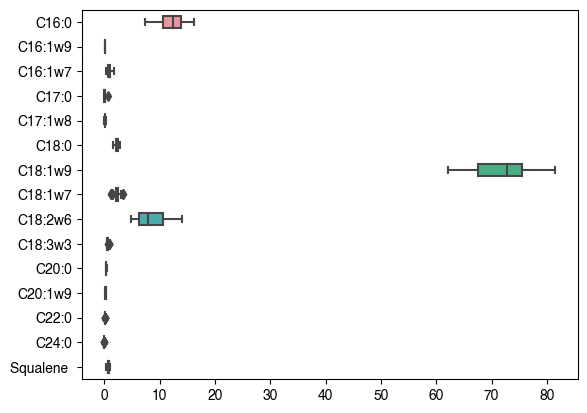

In [10]:
sns.boxplot(data=huiles, orient="h", width=.5)
plt.show()

## Question 2 : réalisation et visualisation d’une ACP.

### Etape 1: Centrer-réduire les valeurs

In [11]:
scaler = StandardScaler()

X = huiles.iloc[:, 1:-1]

scaler.fit(X)

X=scaler.transform(X)

### Etape 2: Réaliser l'ACP

In [12]:
pca = PCA() 

# Modèle d'ACP

data_sortie= pca.fit_transform(X)

# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.
print("Variance expliquée :")
print(pca.singular_values_) # Valeurs de variance
print("Variance expliquée (%):")
print(pca.explained_variance_ratio_) #  Pourcentages

# Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.
print("Axes principaux :")
print(pca.components_) # 

# Résultats de l'ACP
col = ['PC'+str(i+1) for i in range(len(pca.components_))]
PC_scores = pd.DataFrame(data_sortie, columns = col)

sqrt_eigval = np.sqrt((X.shape[0]-1)/X.shape[0]*pca.explained_variance_)
corvar = np.zeros((X.shape[1],X.shape[1]))

for k in range(X.shape[1]):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

loadings = pd.DataFrame(corvar , columns=col, 
                        index=huiles.columns[1:-1])
#loadings = pd.DataFrame(pca.components_.T , columns=col, 
#                        index=huiles.columns[1:-1])

# Bruit estimé lié à la covariance
print("Bruit estimé :")
print(pca.noise_variance_)

Variance expliquée :
[33.4805154  21.76410361 21.06563346 15.18163524 14.11728649 10.62924184
  9.13096494  7.14483261  6.10798939  5.1460995   3.81239933  2.23028465
  2.08274368  1.3399338   0.05030971]
Variance expliquée (%):
[3.99623854e-01 1.68868523e-01 1.58203534e-01 8.21682882e-02
 7.10509012e-02 4.02783537e-02 2.97235368e-02 1.81991562e-02
 1.33003688e-02 9.44111945e-03 5.18160024e-03 1.77332250e-03
 1.54646033e-03 6.40079352e-04 9.02341201e-07]
Axes principaux :
[[-3.98651959e-01  1.86839148e-01 -3.81849747e-01 -1.15254246e-01
  -1.03269609e-01 -1.78772461e-02  3.92705052e-01 -3.64453418e-01
  -3.41551202e-01  1.60079582e-02 -1.47868653e-01  2.54771371e-01
  -2.33458637e-01 -2.98559707e-01  4.14646378e-02]
 [ 5.65234728e-02 -2.63800105e-01  5.43902879e-02  1.54663459e-01
   1.66646361e-01 -4.93895709e-01  8.94459510e-02  1.80556119e-01
  -1.97613929e-01 -2.91613910e-01 -5.42218073e-01 -2.47969075e-01
  -1.65772110e-01 -1.38192616e-01 -2.48744469e-01]
 [ 1.50908169e-02  3.6977

In [13]:
PC_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.582253,1.588170,-1.410649,-0.019602,1.518044,0.164098,-0.310512,0.442870,0.787874,-0.290987,0.158636,0.145306,-0.016721,-0.120383,0.000566
1,-1.617449,0.709673,-0.021363,-0.852321,0.398228,-1.060200,-0.054915,-0.081344,-0.323755,0.261694,0.058085,-0.026130,-0.263904,-0.037442,0.001453
2,-1.475898,1.275531,0.123866,-0.691033,0.654015,-0.804780,-0.108732,-0.004419,-0.307520,-0.113297,0.066074,0.033021,-0.114612,-0.055047,0.000819
3,-1.609048,0.610292,-0.540610,-1.110238,0.426712,-0.805093,0.750017,-0.913580,-0.006260,-0.418861,0.085730,0.144214,-0.005866,0.004471,-0.002198
4,-1.575046,0.737629,0.538450,-0.284319,-0.382792,-0.933090,-0.098538,-0.005385,0.063366,-0.202396,0.235651,0.074206,-0.009702,-0.097796,0.000641


In [14]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
C16:0,-0.976035,0.089960,0.023247,-0.059848,0.113165,-0.060982,0.001180,-0.011739,0.053004,0.003147,0.004490,-0.068471,-0.102298,-0.021974,-1.295424e-03
C16:1w9,0.457445,-0.419851,0.569625,0.248213,0.215786,-0.248823,-0.183297,-0.042798,-0.273883,-0.081048,0.048809,-0.001839,-0.020719,-0.009237,-1.029717e-05
C16:1w7,-0.934897,0.086565,0.134477,0.010508,0.153768,0.058286,-0.181825,0.121194,-0.018094,0.078195,0.121195,0.003741,0.004943,0.065733,-1.784494e-04
C17:0,-0.282181,0.246154,0.663306,0.393938,-0.098438,0.004907,0.455955,0.210986,-0.049591,0.004336,0.002076,0.003541,0.000132,0.000288,-7.528271e-07
C17:1w8,-0.252839,0.265226,0.761396,0.390794,-0.145763,-0.016213,-0.173175,-0.232032,0.111561,0.049530,-0.106721,-0.028917,0.024015,0.015635,-8.286470e-05
C18:0,-0.043770,-0.786059,0.430988,-0.313901,-0.140920,-0.158683,0.107025,-0.040948,0.131479,0.048485,0.111718,-0.052570,0.051483,-0.014440,-1.508549e-04
C18:1w9,0.961475,0.142358,0.039351,0.127142,-0.130155,0.121156,-0.018233,-0.016618,0.031442,0.003898,0.057388,0.031250,0.008523,0.001956,-3.065719e-03
C18:1w7,-0.892305,0.287364,-0.030044,0.174375,0.112355,0.097752,-0.189623,0.086532,-0.056970,0.112514,0.031077,0.018333,0.056942,-0.061898,-2.393051e-04
C18:2w6,-0.836233,-0.314512,-0.179831,-0.252569,0.137177,-0.196676,0.085684,0.030518,-0.119625,-0.045221,-0.142509,-0.001569,0.054111,0.017253,-1.528301e-03
C18:3w3,0.039193,-0.464118,-0.246292,0.531180,0.615889,-0.075879,0.018005,0.050461,0.216726,-0.070375,-0.004376,0.016623,0.008926,-0.000698,-5.153150e-05


### Etape 3 : Contrôler l'ACP par un diagramme de pareto

In [15]:
%run -i helpers.py

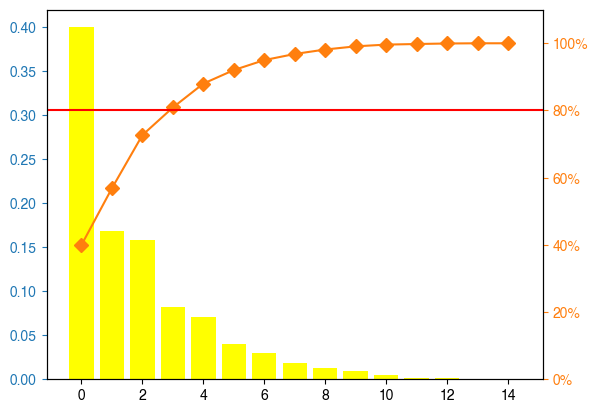

In [16]:
pareto(pca.explained_variance_ratio_)

### Etape 4 : Visualiser les résultats de l'ACP

In [17]:
PC1 = PC_scores.PC1
PC2 = PC_scores.PC2
PC3 = PC_scores.PC3

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
scalePC3 = 1.0/(PC3.max() - PC3.min())

features = huiles.columns[1:-1]

#### Plan 1-2

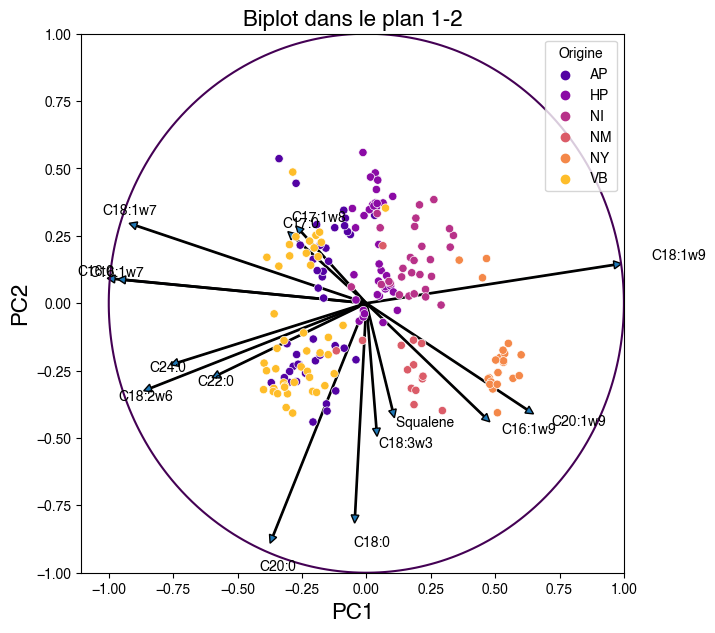

In [18]:
plt.figure(figsize=(7,7))
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings.iloc[i, 0], 
             loadings.iloc[i, 1], 
              head_width=0.03, 
             head_length=0.03, width=0.005)
    plt.text(loadings.iloc[i, 0] * 1.15, 
            loadings.iloc[i, 1] * 1.15, 
            feature, fontsize=10)

x_circle = np.linspace(-1, 1, 100)
y_circle = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_circle,y_circle)
F = X**2 + Y**2 - 1.0
plt.contour(X,Y,F,[0])
    
sns.scatterplot(x=PC1 * scalePC1,
                y=PC2 * scalePC2, 
                hue=huiles.Origine,
                palette="plasma")
 
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('Biplot dans le plan 1-2', fontsize=16)
plt.show()

#### Plan 1-3

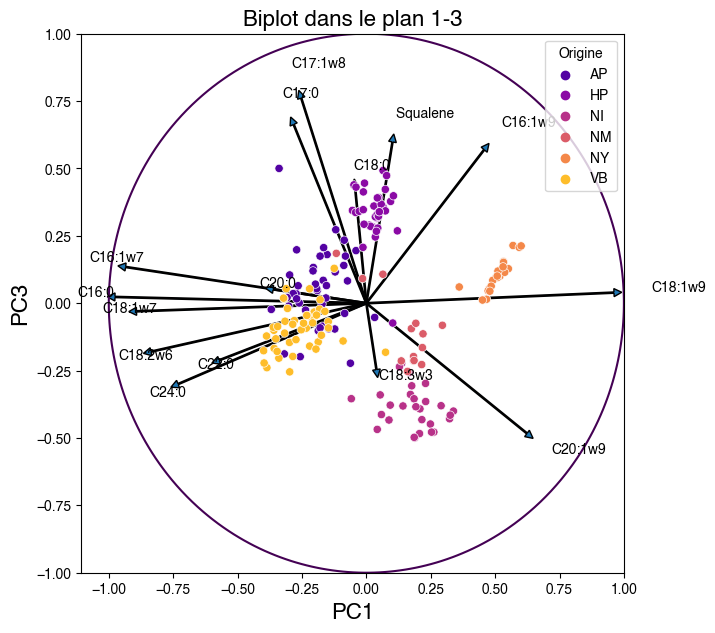

In [19]:
plt.figure(figsize=(7,7))
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings.iloc[i, 0], 
             loadings.iloc[i, 2], 
              head_width=0.03, 
             head_length=0.03, width=0.005)
    plt.text(loadings.iloc[i, 0] * 1.15, 
            loadings.iloc[i, 2] * 1.15, 
            feature, fontsize=10)

x_circle = np.linspace(-1, 1, 100)
y_circle = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_circle,y_circle)
F = X**2 + Y**2 - 1.0
plt.contour(X,Y,F,[0])
    
sns.scatterplot(x=PC1 * scalePC1,
                y=PC3 * scalePC3, 
                hue=huiles.Origine,
                palette="plasma")
 
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC3', fontsize=16)
plt.title('Biplot dans le plan 1-3', fontsize=16)
plt.show()